(ii) Numerical solution to the Lane-Emden equation.

a) Develop a code which solves the Lane-Emden equation (1) for different n numerically. Use the Heun-Method from above or the simple explicit Euler-Method. The first root of the function $\omega$ denotes the radius of the star.

b) Test your code using the analytical solutions. Plot your numerical solutions together with the analytical solutions.

In [33]:
import numpy as np
import matplotlib.pyplot as plt 

def lane_emden(n,h=0.01,z_max=20.0):

    z0 = 1e-10
    w0 = 1.0
    xi0 = -z0/3.0

    z = z0
    w = w0
    xi = xi0

    z_list = [z]
    w_list = [w]
    xi_list = [xi]

    while z < z_max and w > 0:

        
        # K1
        K1_w = xi
        K1_xi = -(2.0 / z * xi + w**n)

        # predictor step
        w_star = w + h * K1_w
        xi_star = xi + h * K1_xi

        # K2
        K2_w = xi_star
        K2_xi = -(2.0 / (z + h) * xi_star + w_star**n)

        # corrector step
        w_new = w + 0.5 * h * (K1_w + K2_w)
        xi_new = xi + 0.5 * h * (K1_xi + K2_xi)

        z += h
        w = w_new
        xi = xi_new

        z_list.append(z)
        w_list.append(w)
        xi_list.append(xi)

    z_arr = np.array(z_list)
    w_arr = np.array(w_list) 
    xi_arr = np.array(xi_list)
    
    return z_arr, w_arr, xi_arr

#### analytical solutions for n=0,1,5

def get_an_w(n,z):
    if n == 0:
        return 1 - (z**2)/6
    elif n == 1:
        return np.sin(z)/z
    elif n == 5:
        return 1 / (1 + (z**2)/3)**0.5

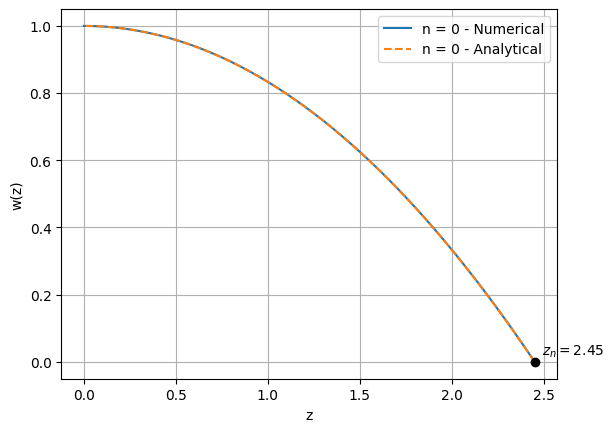

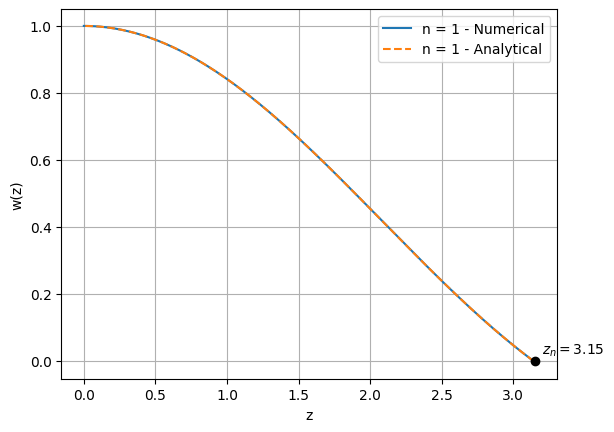

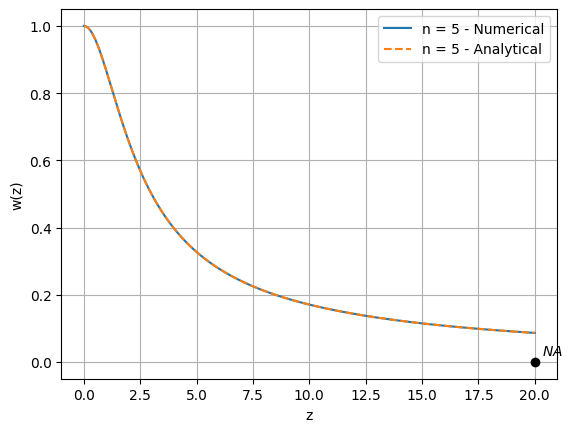

In [34]:
n_values = [0, 1, 5]

for n in n_values:
    z_num, w_num, xi_num = lane_emden(n)
    z_an = np.linspace(0.01, z_num[-1], len(z_num))
    w_an = []
    for z in z_an:
        w_an.append(get_an_w(n, z))
    w_an = np.array(w_an)

    plt.plot(z_num, w_num, label=f"n = {n} - Numerical")
    plt.plot(z_an, w_an, "--" , label=f"n = {n} - Analytical")

    if w_num[-1] < 0:
        plt.plot(z_num[-1], 0, 'ko')  # solid black circle
        plt.annotate(
            f"$z_n = {z_num[-1]:.2f}$",
            (z_num[-1], 0),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=10
        )
    else:
        plt.plot(z_num[-1], 0, 'ko')  # solid black circle
        plt.annotate(
            f"$NA$",
            (z_num[-1], 0),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=10
        )

    plt.xlabel("z")
    plt.ylabel("w(z)")
    plt.legend()
    plt.grid()
    plt.show()



(iii) Use your newly developed code for the following tasks:

a) Calculate the structure of stars for the three different values for the adiabatic exponent $\gamma$ = 3, 5/3 und 7/5, and plot the density. Specify the total mass $M_{*}$ (in
dimensionless units) and the radius (root $z_{n}$) for each case.

b) Model for the Sun: Calculate the structure of a star with one solar mass and the radius of the Sun with n = 3. Provide an estimation for the temperature in the center of the Sun (use $\mu$ = 0.62 and the ideal gas equation).

γ=3, n=0.50
  Radius z_n = 2.7600
  Dimensionless mass M* = 3.8153



C:\Users\harsh\AppData\Local\Temp\ipykernel_29212\3761406104.py:9: RuntimeWarning: invalid value encountered in sqrt
  rho = w**n  # dimensionless density (rho/rho_c)


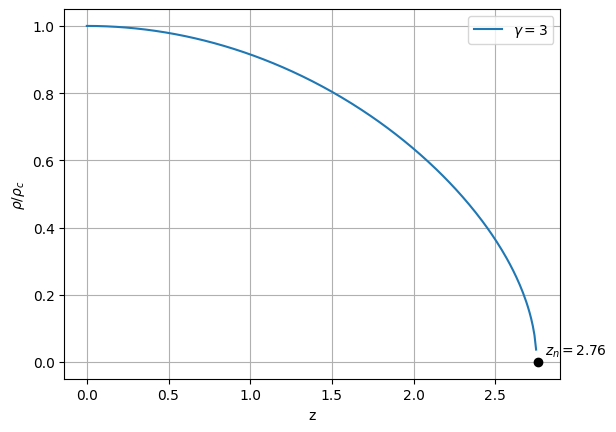

γ=1.6666666666666667, n=1.50
  Radius z_n = 3.6600
  Dimensionless mass M* = 2.7289



C:\Users\harsh\AppData\Local\Temp\ipykernel_29212\3761406104.py:9: RuntimeWarning: invalid value encountered in power
  rho = w**n  # dimensionless density (rho/rho_c)


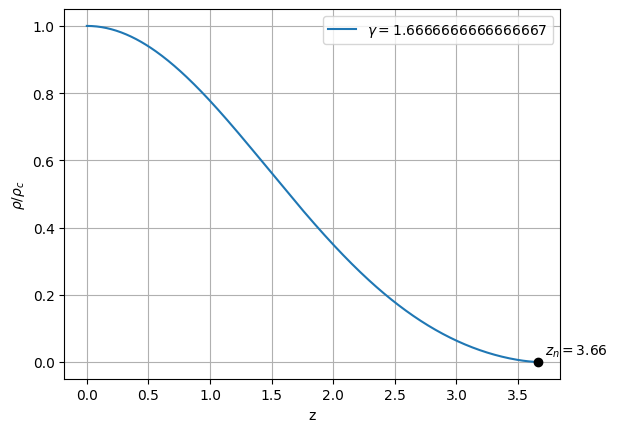

γ=1.4, n=2.50
  Radius z_n = 5.3600
  Dimensionless mass M* = 2.1954



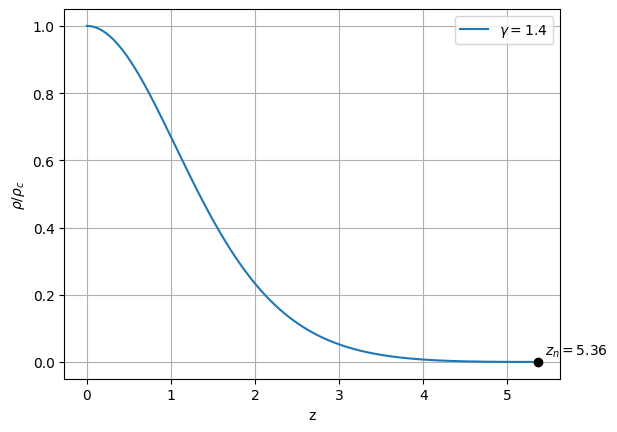

In [41]:
gamma_values = [3, 5/3, 7/5]

for gamma in gamma_values:
    n = 1 / (gamma - 1)

    z, w, xi = lane_emden(n)
    z_root = z[-1]

    rho = w**n  # dimensionless density (rho/rho_c)

    plt.figure()
    plt.plot(z, rho, label=fr"$\gamma={gamma}$")

    if w[-1] < 0:
        plt.plot(z_root, 0, 'ko')  # solid black circle
        plt.annotate(
            f"$z_n = {z_root:.2f}$",
            (z_root, 0),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=10
        )
        xi_surface = xi[len(z)-2]
        xi_surface = np.real(xi_surface)
        M_dim = -z_root**2 * xi_surface
        print(f"γ={gamma}, n={n:.2f}")
        print(f"  Radius z_n = {z_root:.4f}")
        print(f"  Dimensionless mass M* = {M_dim:.4f}\n")
    else:
        plt.plot(z_root, 0, 'ko')  # solid black circle
        plt.annotate(
            f"$NA$",
            (z_root, 0),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=10
        )
        print(f"γ={gamma}, n={n:.2f}")
        print("  No finite root\n")

    plt.xlabel("z")
    plt.ylabel(r"$\rho / \rho_c$")
    plt.grid()
    plt.legend()
    plt.show()
